## Part 1

The following model is given:

\begin{align*}
A &\sim \mathcal{N}(A;0,1.2)\\
B &\sim \mathcal{IG}(R;0.4,250)\\
x_k|x_{k-1},A,R &\sim \mathcal{N}(x_k;Ax_{k-1},R)\\
x_0 &=1\\
x_1 &=-6
\end{align*}

## 1
Draw the directed graphical model and the factor graph

Graphical Model:
<img src="gm.png\" style="width: 300px;\"> 

Factor Graph:
<img src="fg.png\" style="width: 300px;\"> 

## 2
Full joint posterior distribution expression:

\begin{align*}
\phi & = p(A,R,x_k=\hat{x_k} | x_{k-1}=\hat{x_{k-1}}) \propto p(x_k | x_{k-1},A,R)p(A)p(R)\\
& = \mathcal{N}(x_k;Ax_{k-1},R)\mathcal{N}(A;0,1.2)\mathcal{IG}(R;0.4,250)\\
& \propto \exp(-\frac{1}{2}\frac{x_k^2}{R}+x_{k}x_{k-1}\frac{A}{R}-\frac{1}{2}\frac{x_{k-1}^2A^2}{R}-\frac{1}{2}\log2\pi R)\\
& \quad \exp(-\frac{1}{2}\frac{A^2}{1.2}-\frac{1}{2}\log|2\pi 1.2|)\\
& \quad \exp(-1.4\log R-\frac{250}{R}-\log \Gamma(0.4)+0.4\log250)
\end{align*}

Factors:

\begin{align*}
\log\phi & = -\frac{1}{2}\frac{x_k^2}{R}+x_{k}x_{k-1}\frac{A}{R}-\frac{1}{2}\frac{x_{k-1}^2A^2}{R}-\frac{1}{2}\log R -\frac{1}{2}\frac{A^2}{1.2}-(1.4)\log R-\frac{250}{R}\\
\end{align*}

\begin{align*}
q(A)&=\exp(-\frac{1}{2}\frac{A^2}{1.2})\\
q(R)&=\exp\left(-1.9\log R -(250+\frac{x_k^2}{2}+\frac{1}{R})\right)\\
q(x_{k-1},x_k) &= \exp\left(x_{k-1}x_k\frac{A}{R}-\frac{1}{2}\frac{x_{k-1}^2A^2}{R}\right)
\end{align*}




## 3
Derive the full conditional distributions p(A|R,x0,x1) and p(R|A,x0,x1)

\begin{align} 
p(A|R,x_{k-1},x_k) &\propto exp\big{(}-\frac{1}{2}\frac{A^2}{P}+x_{k-1}x_{k}\frac{A}{R}-\frac{1}{2}\frac{x_{k-1}^2A^2}{R}\big{)}\\
p(R|A,x_{k-1},x_{k}) &\propto exp\big{(}-(1.9)\log R-\big{(}\frac{0.4}{\beta}+\frac{1}{2}x_k^2\big{)}\frac{1}{R}+x_{k-1}x_k\frac{A}{R}-\frac{1}{2}\frac{x_{k-1}^2A^2}{R}\big{)}\\
\end{align}

## 4

Derive the joint distribution p(A, R, x0 = 1, x1 =  6) and create a contour plot.

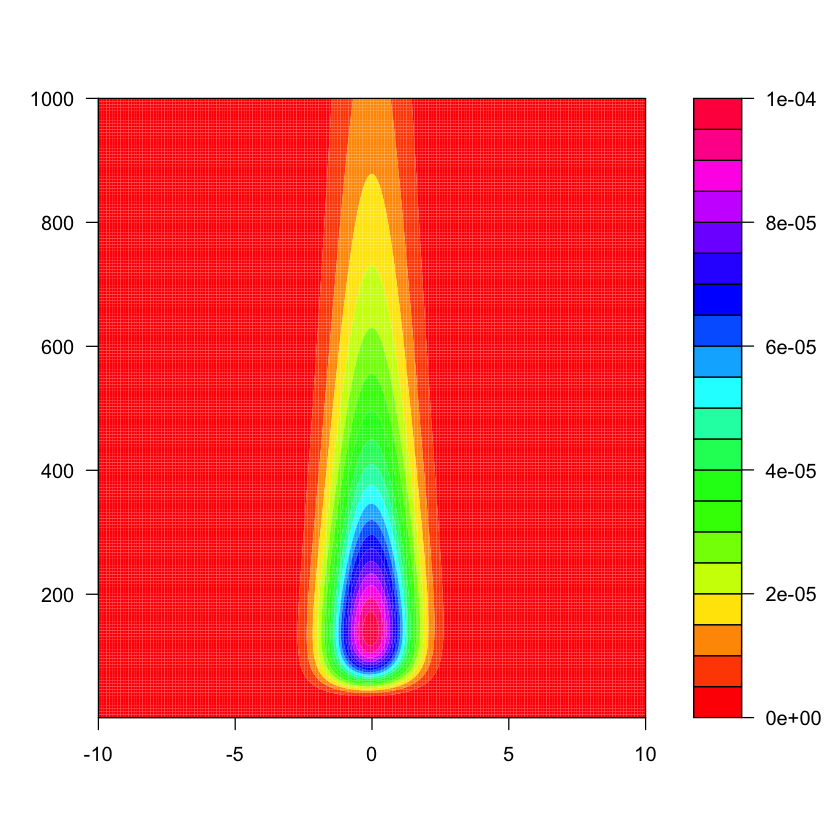

In [29]:
p=1.2
nu=0.4
x0=1
x1=-6
b=0.0016

A=seq(-10,10,length.out=200)
R=seq(1,1000,length.out=200)
v=NULL

for (r in R){
  v1=NULL
  for (a in A){
    x=-(x1^2)/(2*r) + x0*x1*a/r - ((a*x0)^2)/(2*r)- log(2*pi*r)/2
    y=-(a^2)/(2*p) - log(abs(2*pi*p))/2
    z=-(nu+1)*log(r) - (nu/b)*(1/r) - log(dgamma(1,nu)) + nu*log(nu/b)
    v1=append(v1,exp(x+y+z))
  }
  v=append(v,v1)
}
v=matrix(v, nrow=length(A),ncol=length(R))

filled.contour(A,R,v, color.palette=rainbow)


# Part 2
